In [ ]:
# Copyright Elasticsearch B.V. and/or licensed to Elasticsearch B.V. under one
# or more contributor license agreements. Licensed under the Elastic License;
# you may not use this file except in compliance with the Elastic License.

In [27]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dataset_name = 'ccpp'
D = pd.read_csv('datasets/{}.csv'.format(dataset_name))
D.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'default sample')

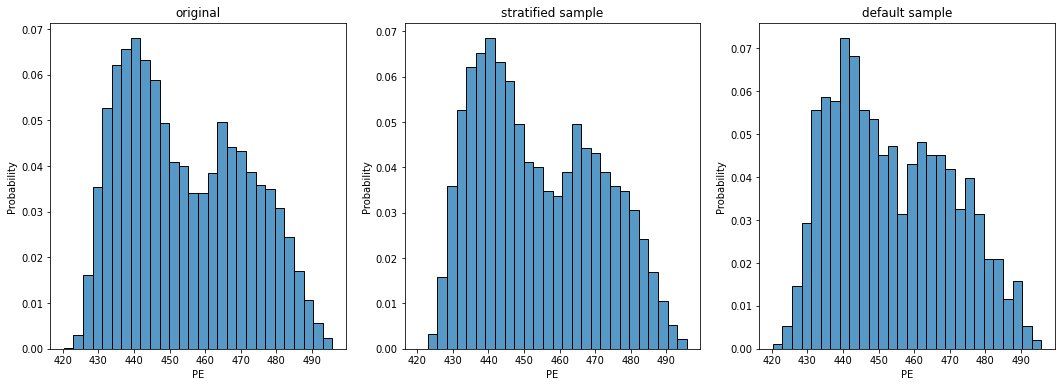

In [34]:
samples_per_bin, bins, = np.histogram(D.PE, bins='auto')    

D['bin'] = pd.cut(D.PE, bins)

sample = D.groupby('bin', group_keys=False).apply(lambda x: x.sample(frac=0.1, replace=False))

dumb_sample = D.sample(frac=0.1, replace=False)

fig, axes = plt.subplots(1,3, figsize=(18,6))
sns.histplot(D.PE, bins=bins, stat='probability',ax=axes[0])
axes[0].set_title('original')
sns.histplot(sample.PE, bins=bins, stat='probability',ax=axes[1])
axes[1].set_title('stratified sample')
sns.histplot(dumb_sample.PE, bins=bins, stat='probability',ax=axes[2])
axes[2].set_title('default sample')